<a href="https://colab.research.google.com/github/ignaciomz/CH_IM_61140/blob/main/WineQuality_Parte2_Mart%C3%ADnez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis de la Calidad del Vino**: *Un Estudio Basado en Datos*

 En el presente estudio se realiza un análisis exhaustivo de la calidad del vino utilizando un conjunto de datos obtenido de Kaggle. Este dataset incluye diversas variables cuantitativas que son fundamentales para la evaluación de las características físicas y químicas del vino. Las variables consideradas en este análisis son: acidez fija, acidez volátil, ácido cítrico, azúcar residual, cloruros, dióxido de azufre libre, dióxido de azufre total, densidad pH, sulfatos, alcohol y calidad, junto con un identificador único (Id) para cada muestra.

 El objetivo principal de este análisis es determinar cómo las diferentes propiedades químicas del vino influyen en su calidad final, que está representada por una variable categórica en el dataset.

 Este análisis proporciona una comprensión detallada de cómo las propiedades químicas influyen en la calidad del vino. Los resultados obtenidos no solo son útiles para los productores de vino en la optimización de sus procesos, sino también para los consumidores y expertos que buscan entender mejor las características que definen un vino de alta calidad. Las técnicas de machine learning aplicadas en este estudio demuestran ser herramientas valiosas para la predicción y evaluación de la calidad del vino, abriendo puertas a futuras investigaciones y aplicaciones en la enología. Además, se exploran técnicas de análisis exploratorio y visualización de datos para identificar patrones y relaciones significativas entre las variables, facilitando una interpretación más profunda de los factores determinantes de la calidad del vino.

# **GLOSARIO**

 **Fixed Acidity (Acidez Fija)**: Representa la cantidad total de ácidos no volátiles presentes en el vino, como el ácido tartárico y el ácido málico. Contribuye a la estructura y estabilidad del vino.

 **Volatile Acidity (Acidez Volátil)**: Indica la concentración de ácidos volátiles, principalmente el ácido acético, en el vino. Altos niveles de acidez volátil pueden dar lugar a aromas y sabores desagradables, como el vinagre.

 **Citric Acid (Ácido Cítrico):** Es un ácido orgánico que se encuentra de forma natural en muchas frutas cítricas. En el vino, puede contribuir a la acidez total y proporcionar un sabor fresco y cítrico.

 **Residual Sugar (Azúcar Residual)**: Es la cantidad de azúcar que permanece sin fermentar en el vino después del proceso de fermentación. Contribuye al cuerpo, dulzura y equilibrio del vino.

 **Chlorides (Cloruros)**: Representa la concentración de cloruros en el vino, que puede provenir tanto de la uva como del proceso de vinificación. Puede afectar el sabor y la percepción de la acidez del vino.

 **Free Sulfur Dioxide (Dióxido de Azufre Libre)**: Es una forma de dióxido de azufre (SO2) que actúa como antioxidante y conservante en el vino. Ayuda a prevenir la oxidación y el crecimiento de microorganismos no deseados.

 **Total Sulfur Dioxide (Dióxido de Azufre Total)**: Representa la cantidad total de dióxido de azufre (libre más unido) presente en el vino. Se utiliza como medida de la estabilidad y conservación del vino.

 **Density (Densidad)**: Indica la densidad del vino, generalmente medida en g/ml. Puede estar relacionada con el contenido de azúcar y alcohol del vino, así como con su cuerpo y viscosidad.

 **pH:** Es una medida de la acidez o alcalinidad del vino en una escala de 0 a 14, donde 7 es neutro. Un pH más bajo indica mayor acidez, mientras que un pH más alto indica menor acidez.

 **Sulphates (Sulfatos)**: Representa la concentración de sulfatos en el vino, que pueden provenir de aditivos como el metabisulfito de potasio. Se utilizan como conservantes y antioxidantes en el vino.

 **Alcohol**: Indica el contenido de alcohol en volumen (% ABV) del vino. Afecta el cuerpo, el sabor y la sensación de calor en el vino.

 **Quality (Calidad)**: Es una medida subjetiva de la calidad percibida del vino, generalmente evaluada por catadores o expertos enológicos. Puede basarse en múltiples factores, incluidos el aroma, sabor, textura y equilibrio del vino.


# **Preguntas de Investigación**

1. ¿Existe una relación significativa entre el contenido de alcohol y la calidad del vino?
2. ¿Cómo afecta la acidez volátil y el pH del vino en conjunto a la calidad del vino?
3. ¿Qué combinación de propiedades químicas se asocia más comúnmente con vinos de alta calidad?

# **Hipótesis de Investigación**

 Las propiedades químicas del vino, como el contenido de alcohol, la acidez volátil, y el pH, tienen una influencia significativa y predecible en la calidad del vino.

In [99]:
import pandas as pd

In [100]:
url = "https://raw.githubusercontent.com/ignaciomz/CH_IM_61140/main/WineQT.csv"
qw = pd.read_csv(url, sep=";")

In [101]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [102]:
qw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [103]:
qw.alcohol.describe()

count     1143
unique      61
top        9.5
freq        92
Name: alcohol, dtype: object

In [104]:
# Aquí tuvimos problemas con el tipo de dato dentro de alcohol.
# Cambiamos ello.

qw = qw[pd.to_numeric(qw['alcohol'], errors='coerce').notnull()]
qw['alcohol'] = qw['alcohol'].astype(float)
qw.groupby('quality')['alcohol'].mean()
media_alcohol = qw.groupby('quality')['alcohol'].mean()
media_alcohol

<ipython-input-104-c27581dbbae1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qw['alcohol'] = qw['alcohol'].astype(float)


quality
3     9.691667
4    10.260606
5     9.902277
6    10.660262
7    11.467958
8    11.937500
Name: alcohol, dtype: float64

<ipython-input-105-2a6cb486c173>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=qw, palette='Purples')


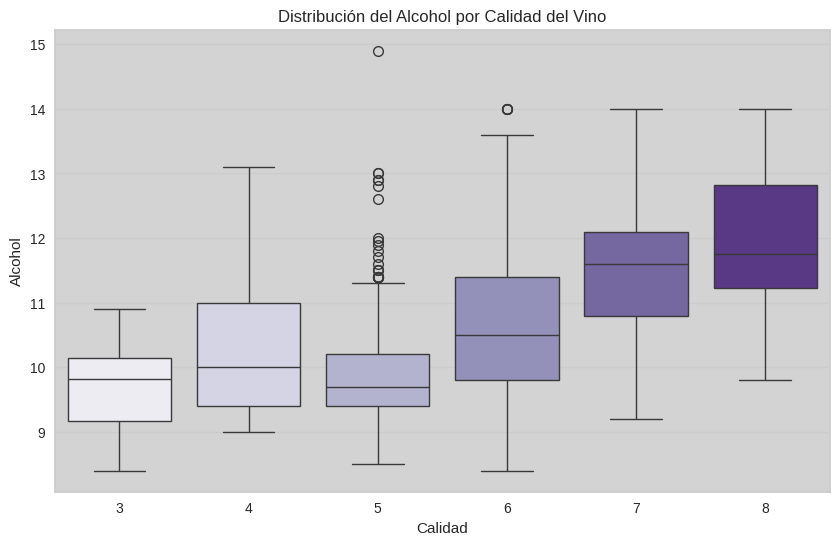

In [105]:
#Para ayudar a comprender la distribución de los valores globales de alcohol según la calidad del vino,
#realicé un boxplot.
#Podemos observar mejor su distribución apreciando los valores outliers.

plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('lightgrey')
sns.boxplot(x='quality', y='alcohol', data=qw, palette='Purples')
plt.xlabel('Calidad')
plt.ylabel('Alcohol')
plt.title('Distribución del Alcohol por Calidad del Vino')
plt.show()

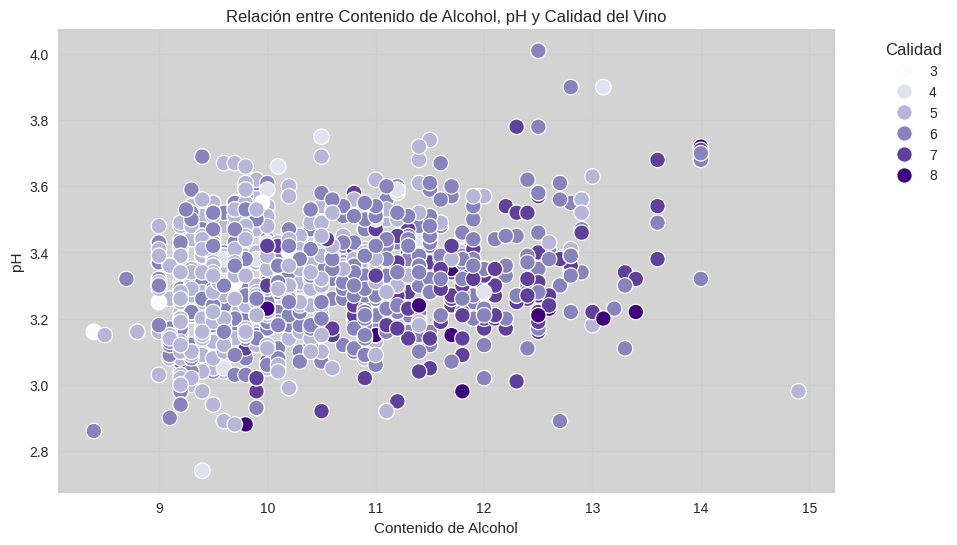

In [106]:

#Aqui, decidí ir mas adelante, y combinar el contenido de alcohol y el pH segun la calidad del vino.
#Podemos observar, que la mayoría de los vinos de mayor calidad, se encuentra entre los valores de cantidad de alcohol entre 11 y 13.
#Y un pH medio entre los valores de 3.0 y 3.6

plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('lightgrey')
scatter = sns.scatterplot(x='alcohol', y='pH', hue='quality', palette='Purples', data=qw, s=125)
plt.xlabel('Contenido de Alcohol')
plt.ylabel('pH')
plt.title('Relación entre Contenido de Alcohol, pH y Calidad del Vino')
plt.legend(title='Calidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

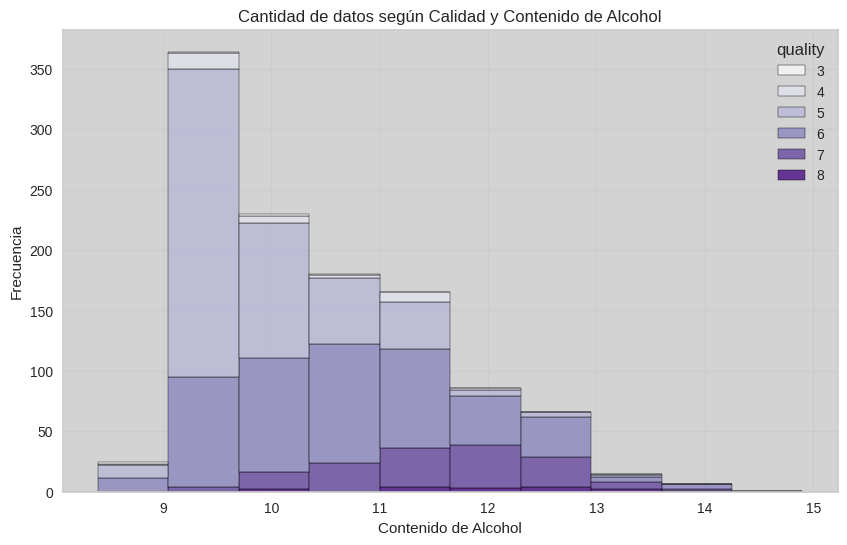

In [107]:
#A raíz de las conclusiones anteriores, se me ocurrió observar, como era la distribución en mi dataframe, de cantidad de valores registrados.
#Así vemos, que tengo mayores valores registrados de vino con una calidad media-baja y menor contenido de alcohol.


plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('lightgrey')
sns.histplot(data=qw, x='alcohol', hue='quality', palette='Purples', multiple='stack', bins=10)
plt.xlabel('Contenido de Alcohol')
plt.ylabel('Frecuencia')
plt.title('Cantidad de datos según Calidad y Contenido de Alcohol')
plt.show()

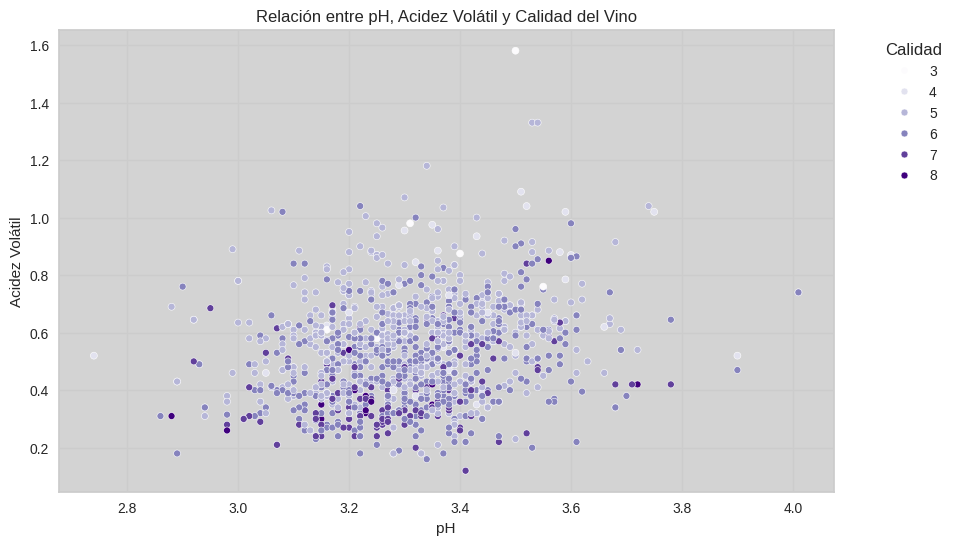

In [108]:
#Analizando lo anterior, y tomando como punto de partida el pH. Decidí analizar la acidez volatil que responde
#al tiempo de añejamiento del vino. Y contrario a lo que se tiende a pensar, si a mayor añejamiento aumenta la acidez volatil
#vemos en este grafico que a menos acidez volatil y un pH medio, el vino resulta de mayor calidad.

plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('lightgrey')
scatter = sns.scatterplot(x='pH', y='volatile acidity', hue='quality', palette='Purples', data=qw, s=25)
plt.xlabel('pH')
plt.ylabel('Acidez Volátil')
plt.title('Relación entre pH, Acidez Volátil y Calidad del Vino')
plt.legend(title='Calidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-109-75733d6d71b7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='quality', y='residual sugar', data=qw, palette='Purples')


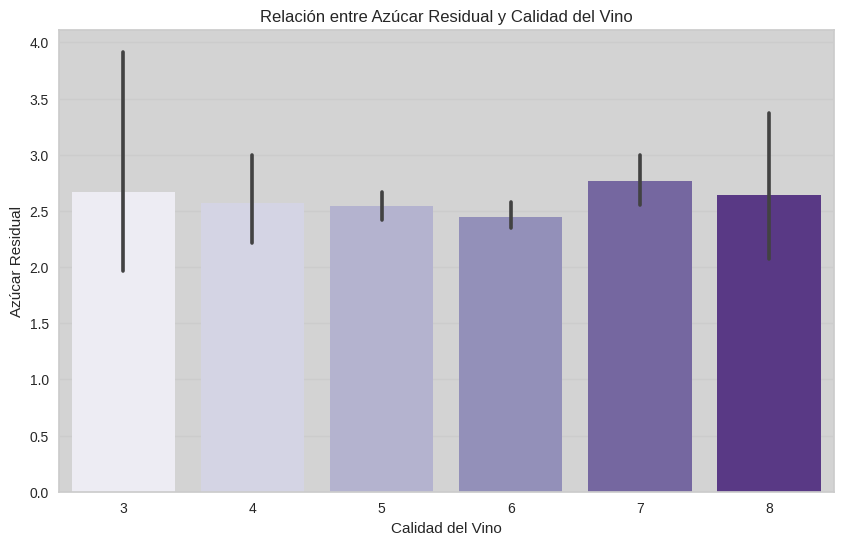

In [109]:
#En este caso, luego de analizar la acidez del vino, me propuse observar la influencia del azucar en la calidad.
#Como vemos, mas allá de la presencia de valores outliers, se mantiene una relativa parcialidad en la presencia
#del azucar residual en las distintas calidades del data set.

plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('lightgrey')
barplot = sns.barplot(x='quality', y='residual sugar', data=qw, palette='Purples')
plt.xlabel('Calidad del Vino')
plt.ylabel('Azúcar Residual')
plt.title('Relación entre Azúcar Residual y Calidad del Vino')
plt.show()

In [110]:
#Habiendo observado la distribución a partir de mis preguntas de investigación, comienzo a indagar al dataframe de forma estadística.

qw.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,Id
count,1138.00,1138.00,1138.00,1138.00,1138.00,1138.00,1138.00,1138.00,1138.00,1138.00,1138.00,1138.00
mean,8.31,0.53,0.27,2.53,0.09,15.62,45.85,3.31,0.66,10.44,5.65,802.22
std,1.74,0.18,0.20,1.36,0.05,10.25,32.79,0.16,0.17,1.08,0.81,463.14
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,2.74,0.33,8.40,3.00,0.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,21.00,3.21,0.55,9.50,5.00,409.25
50%,7.90,0.52,0.25,2.20,0.08,13.00,37.00,3.31,0.62,10.20,6.00,791.50
75%,9.10,0.64,0.42,2.60,0.09,21.00,61.00,3.40,0.73,11.10,6.00,1205.50
max,15.90,1.58,1.00,15.50,0.61,68.00,289.00,4.01,2.00,14.90,8.00,1597.00


In [111]:
#Primero, saber si la cantidad de valores en la calidad del vino se corresponde, es coherente, con su mediana y media.

mean = qw.quality.mean()
median = qw.quality.median()

print("La media de la calidad del vino es:", mean)
print("La mediana de la calidad del vino es:", median)


La media de la calidad del vino es: 5.654657293497364
La mediana de la calidad del vino es: 6.0


In [112]:
#Atendiendo el histograma realizado anteriormente, analizando la frecuencia con la que aparecen los calidades de los vinos, vamos a ralizar
#un análisis del coeficiente de variación de mi columna Quality.

desv_std = (qw.quality.std())/(qw.quality.mean())*100
print("El coeficiente de variación de la columna Quality es:", desv_std)

#Entendiendo que es menor al 30%, la media es representativa. Además, con los calculos realizados anteriormente, vemos la cercania numerica entre la Media y la Mediana.


El coeficiente de variación de la columna Quality es: 14.25995155211733


<Axes: >

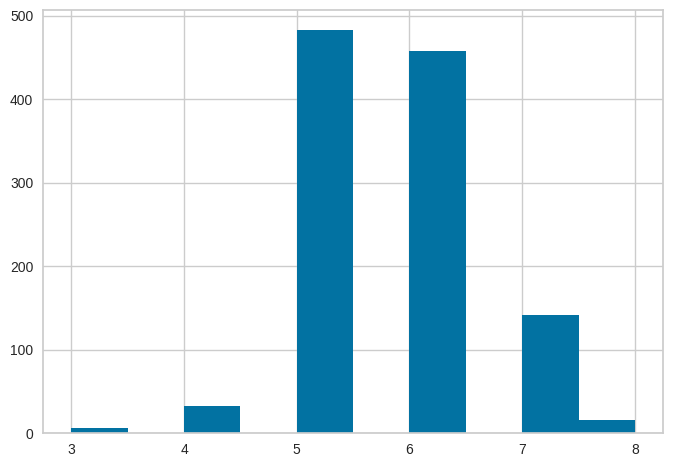

In [113]:
#En un histograma rápido, podemos observar como se corresponde la frecuencia de los valores de Quality del data frame.

qw.quality.hist()

In [114]:
qw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1138 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1138 non-null   float64
 1   volatile acidity      1138 non-null   float64
 2   citric acid           1138 non-null   float64
 3   residual sugar        1138 non-null   float64
 4   chlorides             1138 non-null   float64
 5   free sulfur dioxide   1138 non-null   float64
 6   total sulfur dioxide  1138 non-null   float64
 7   density               1138 non-null   object 
 8   pH                    1138 non-null   float64
 9   sulphates             1138 non-null   float64
 10  alcohol               1138 non-null   float64
 11  quality               1138 non-null   int64  
 12  Id                    1138 non-null   int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 124.5+ KB


In [115]:
qw.density.describe()

count       1138
unique       388
top       0.9976
freq          27
Name: density, dtype: object

In [116]:
# Al seguir analizando el dataframe, descubro que la variable "density", que tiene valores relevantes para el estudio, se encuentra como object.
# Debo cambiar su valor para poder seguir operando.

qw = qw[qw['density'] != '10.001.200.000.000.000']
qw['density'] = qw['density'].replace('10.001.200.000.000.000', np.nan)
qw['density'] = qw['density'].astype(float)

<ipython-input-116-1f21e18c3d36>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qw['density'] = qw['density'].replace('10.001.200.000.000.000', np.nan)
<ipython-input-116-1f21e18c3d36>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qw['density'] = qw['density'].astype(float)


In [117]:
qw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1137 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1137 non-null   float64
 1   volatile acidity      1137 non-null   float64
 2   citric acid           1137 non-null   float64
 3   residual sugar        1137 non-null   float64
 4   chlorides             1137 non-null   float64
 5   free sulfur dioxide   1137 non-null   float64
 6   total sulfur dioxide  1137 non-null   float64
 7   density               1137 non-null   float64
 8   pH                    1137 non-null   float64
 9   sulphates             1137 non-null   float64
 10  alcohol               1137 non-null   float64
 11  quality               1137 non-null   int64  
 12  Id                    1137 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 124.4 KB


In [118]:
#Aquí, veo que efectivamente el cambio esta realizado, y ahora puedo operar con los valores de densidad.

qw.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1137.00,1137.00,1137.00,1137.00,1137.00,1137.00,1137.00,1137.00,1137.00,1137.00,1137.00,1137.00,1137.00
mean,8.31,0.53,0.27,2.53,0.09,15.63,45.87,2.26,3.31,0.66,10.44,5.65,802.22
std,1.74,0.18,0.20,1.36,0.05,10.26,32.80,9.82,0.16,0.17,1.08,0.81,463.34
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00,0.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,21.00,1.00,3.21,0.55,9.50,5.00,409.00
50%,7.90,0.52,0.25,2.20,0.08,13.00,37.00,1.00,3.31,0.62,10.20,6.00,791.00
75%,9.10,0.64,0.42,2.60,0.09,21.00,61.00,1.00,3.40,0.73,11.10,6.00,1206.00
max,15.90,1.58,1.00,15.50,0.61,68.00,289.00,100.37,4.01,2.00,14.90,8.00,1597.00


In [119]:
# Me doy cuenta, que tengo valores anómalos en la columna density. Para lo cual, procedo a identificarlos y eliminarlos.

Q1 = qw['density'].quantile(0.25)
Q3 = qw['density'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

qw_eliminado = qw[(qw['density'] >= lower_bound) & (qw['density'] <= upper_bound)]

print("\nValores sin outliers:")
qw_eliminado.describe().round(2)


Valores sin outliers:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1073.00,1073.00,1073.00,1073.00,1073.00,1073.00,1073.00,1073.00,1073.00,1073.00,1073.00,1073.00,1073.00
mean,8.19,0.53,0.26,2.44,0.09,15.51,45.36,1.00,3.31,0.66,10.42,5.65,813.82
std,1.55,0.18,0.19,1.07,0.05,10.13,32.82,0.00,0.15,0.17,1.03,0.80,467.22
min,4.60,0.12,0.00,1.20,0.04,1.00,6.00,0.99,2.74,0.33,8.40,3.00,0.00
25%,7.10,0.40,0.09,1.90,0.07,7.00,21.00,1.00,3.21,0.55,9.50,5.00,416.00
50%,7.90,0.53,0.24,2.20,0.08,13.00,36.00,1.00,3.31,0.62,10.20,6.00,819.00
75%,9.00,0.64,0.41,2.60,0.09,21.00,60.00,1.00,3.40,0.72,11.10,6.00,1220.00
max,15.90,1.58,1.00,9.00,0.61,68.00,289.00,1.00,4.01,2.00,14.90,8.00,1597.00


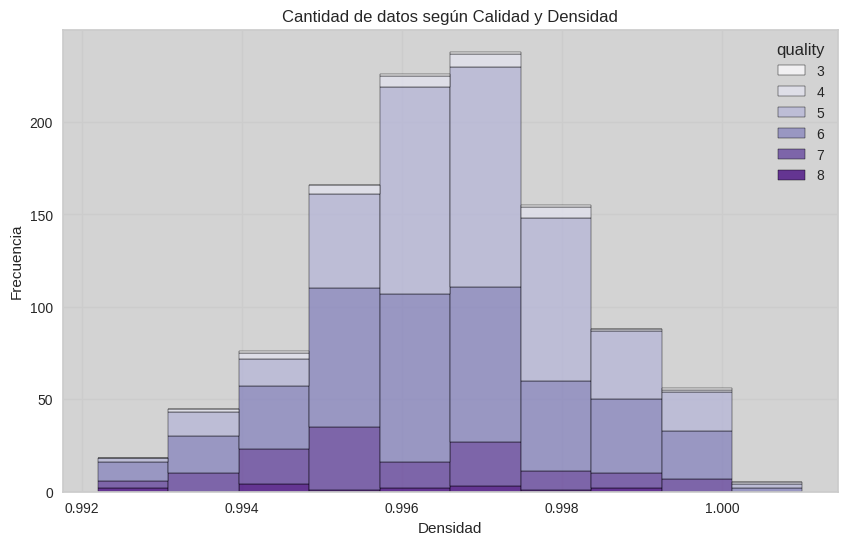

In [120]:
# Ahora si, procedo a realizar un Histplot para obersvar la distribución de las densidades segun la calidad.

plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('lightgrey')
sns.histplot(data=qw_eliminado, x='density', hue='quality', palette='Purples', multiple='stack', bins=10)
plt.xlabel('Densidad')
plt.ylabel('Frecuencia')
plt.title('Cantidad de datos según Calidad y Densidad')
plt.show()

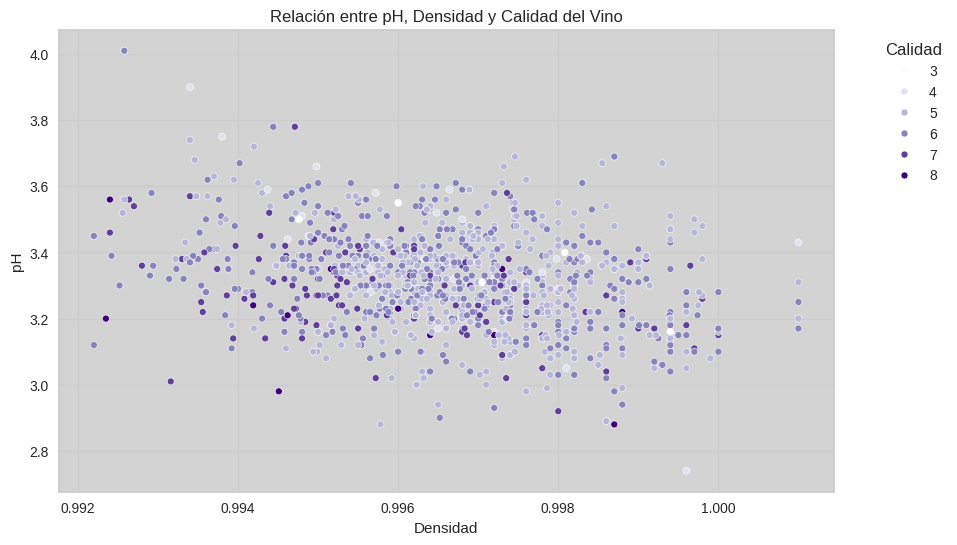

In [121]:
# Bien, aqui ya podemos observar, que hay mayor cantidad de vinos de calidades mas altas en niveles medios de calidad.
#Vemos tambien, que a valores medios de pH, y valores medios de densidad, figuran los vinos de mejor calidad.

plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('lightgrey')
scatter = sns.scatterplot(x='density', y='pH', hue='quality', palette='Purples', data=qw_eliminado, s=25)
plt.xlabel('Densidad')
plt.ylabel('pH')
plt.title('Relación entre pH, Densidad y Calidad del Vino')
plt.legend(title='Calidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

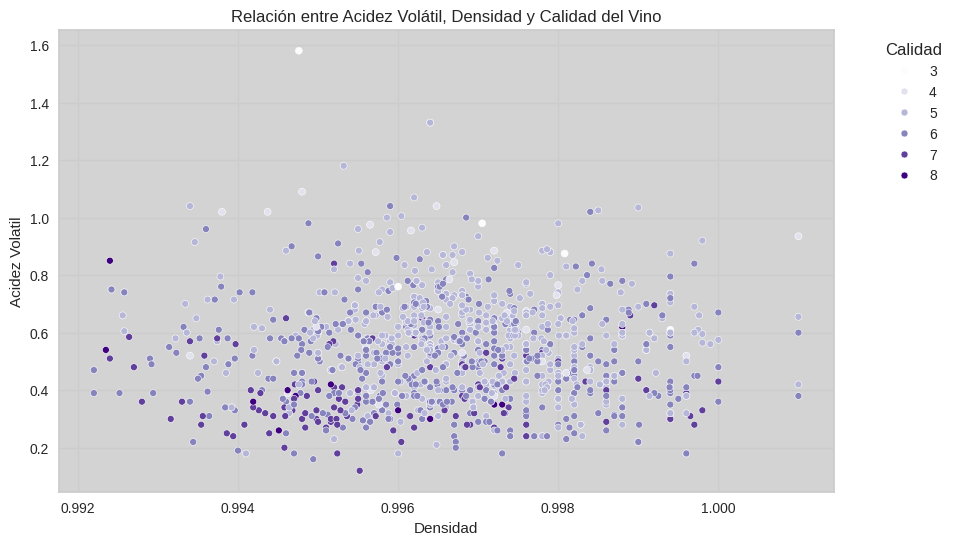

In [122]:
# Aqui volvemos a comparar, la acidez volátil con la densidad, identificando calidades y vemos las mismas conclusiones.
# Densidades medias, y baja acidez volátil, vinos de mejor calidad.

plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('lightgrey')
scatter = sns.scatterplot(x='density', y='volatile acidity', hue='quality', palette='Purples', data=qw_eliminado, s=25)
plt.xlabel('Densidad')
plt.ylabel('Acidez Volatil')
plt.title('Relación entre Acidez Volátil, Densidad y Calidad del Vino')
plt.legend(title='Calidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

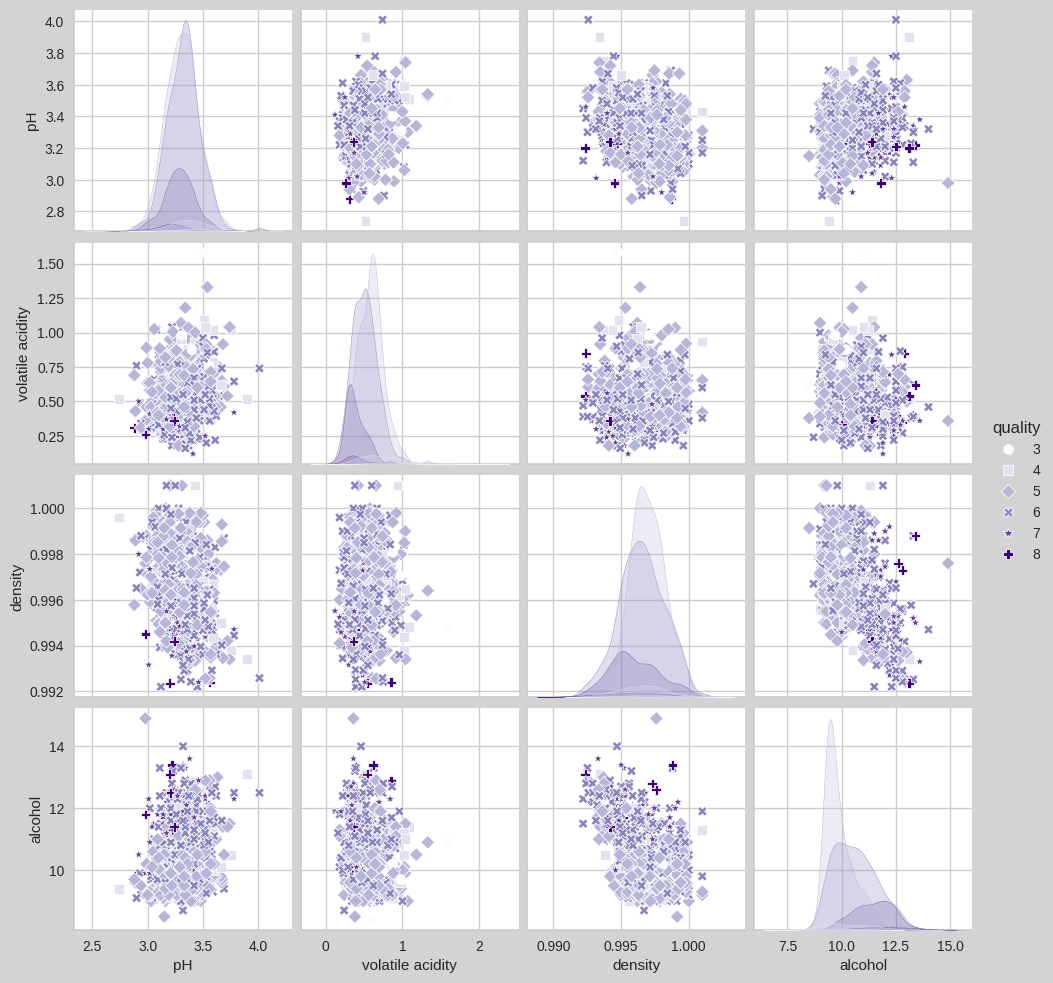

In [123]:
# Intentaremos analizar varias variables al mismo tiempo.
# Aqui vemos como la constante en valores medios, ya sea de pH, acidez volatel, y densidad, se mantiene para vinos de alta calidad.
# Pero, tambien vemos, que se mantiene una constante de valores altos de alcohol para las respectivas variables y calidad alta.

sns.pairplot(qw_eliminado, vars=['pH', 'volatile acidity', 'density', 'alcohol'], hue='quality', palette='Purples', diag_kind='kde', markers=["o", "s", "D", "X", "*", "P"])

plt.gcf().set_facecolor('lightgrey')
plt.show()

In [124]:
qw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1137 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1137 non-null   float64
 1   volatile acidity      1137 non-null   float64
 2   citric acid           1137 non-null   float64
 3   residual sugar        1137 non-null   float64
 4   chlorides             1137 non-null   float64
 5   free sulfur dioxide   1137 non-null   float64
 6   total sulfur dioxide  1137 non-null   float64
 7   density               1137 non-null   float64
 8   pH                    1137 non-null   float64
 9   sulphates             1137 non-null   float64
 10  alcohol               1137 non-null   float64
 11  quality               1137 non-null   int64  
 12  Id                    1137 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 124.4 KB


In [125]:
# Bien, continuamos evaluando otras variables.
# En este caso, analizaremos el Acido Citrico.

qw['citric acid'].describe()

count    1137.000000
mean        0.268294
std         0.196748
min         0.000000
25%         0.090000
50%         0.250000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64

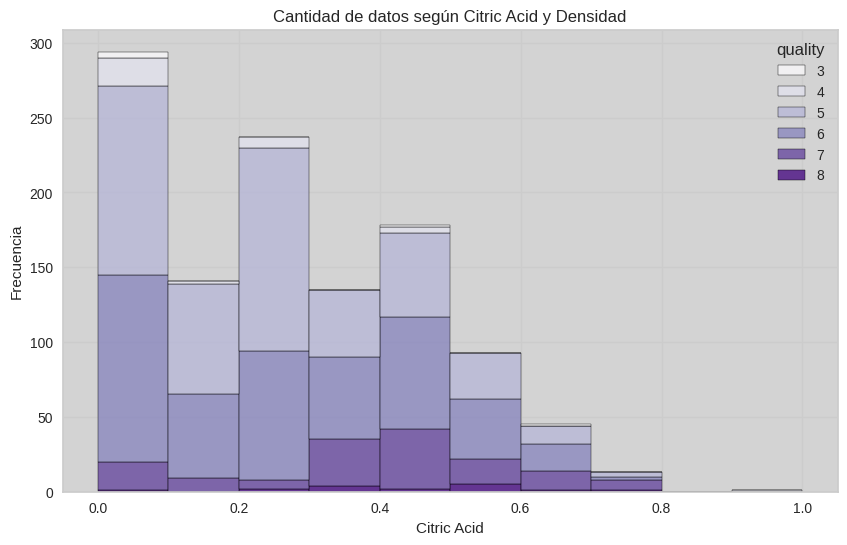

In [126]:
# Aqui vemos que tengo valores varios, pero puedo comenzar a ver tendencias en la zona media.

plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('lightgrey')
sns.histplot(data=qw, x='citric acid', hue='quality', palette='Purples', multiple='stack', bins=10)
plt.xlabel('Citric Acid')
plt.ylabel('Frecuencia')
plt.title('Cantidad de datos según Citric Acid y Densidad')
plt.show()

<ipython-input-127-31c9065f3be0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='citric acid', data=qw, palette='Purples')


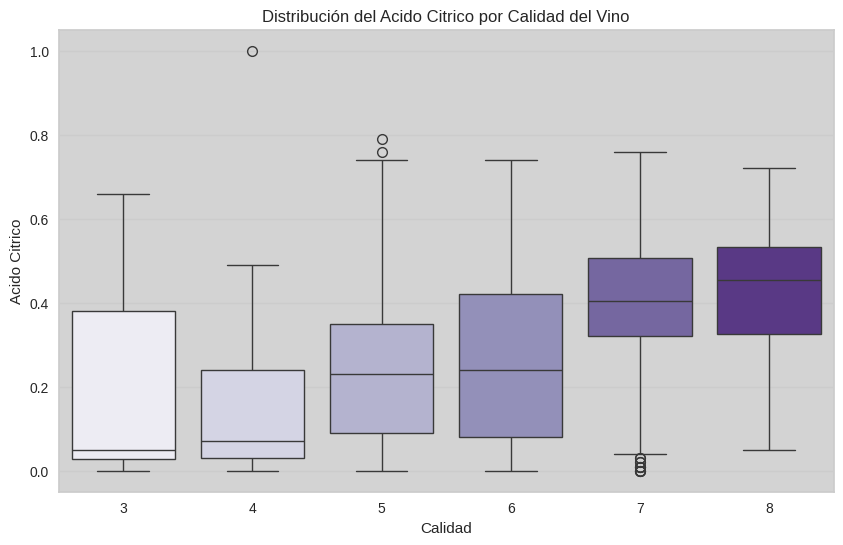

In [127]:
# Realizamos un boxplot intentando ver rapidamente presencia de outliers.

plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('lightgrey')
sns.boxplot(x='quality', y='citric acid', data=qw, palette='Purples')
plt.xlabel('Calidad')
plt.ylabel('Acido Citrico')
plt.title('Distribución del Acido Citrico por Calidad del Vino')
plt.show()

# Guiandonos por este gráfico, podemos observar que las medias del ácido citrico, van en ascenso según la calidad del vino.

In [128]:
# Probemos remover outliers.

Q1 = qw['citric acid'].quantile(0.25)
Q3 = qw['citric acid'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

qw_ac_eliminado = qw[(qw['citric acid'] >= lower_bound) & (qw['citric acid'] <= upper_bound)]

print("\nValores sin outliers:")
qw_eliminado.describe().round(2)


Valores sin outliers:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1073.00,1073.00,1073.00,1073.00,1073.00,1073.00,1073.00,1073.00,1073.00,1073.00,1073.00,1073.00,1073.00
mean,8.19,0.53,0.26,2.44,0.09,15.51,45.36,1.00,3.31,0.66,10.42,5.65,813.82
std,1.55,0.18,0.19,1.07,0.05,10.13,32.82,0.00,0.15,0.17,1.03,0.80,467.22
min,4.60,0.12,0.00,1.20,0.04,1.00,6.00,0.99,2.74,0.33,8.40,3.00,0.00
25%,7.10,0.40,0.09,1.90,0.07,7.00,21.00,1.00,3.21,0.55,9.50,5.00,416.00
50%,7.90,0.53,0.24,2.20,0.08,13.00,36.00,1.00,3.31,0.62,10.20,6.00,819.00
75%,9.00,0.64,0.41,2.60,0.09,21.00,60.00,1.00,3.40,0.72,11.10,6.00,1220.00
max,15.90,1.58,1.00,9.00,0.61,68.00,289.00,1.00,4.01,2.00,14.90,8.00,1597.00


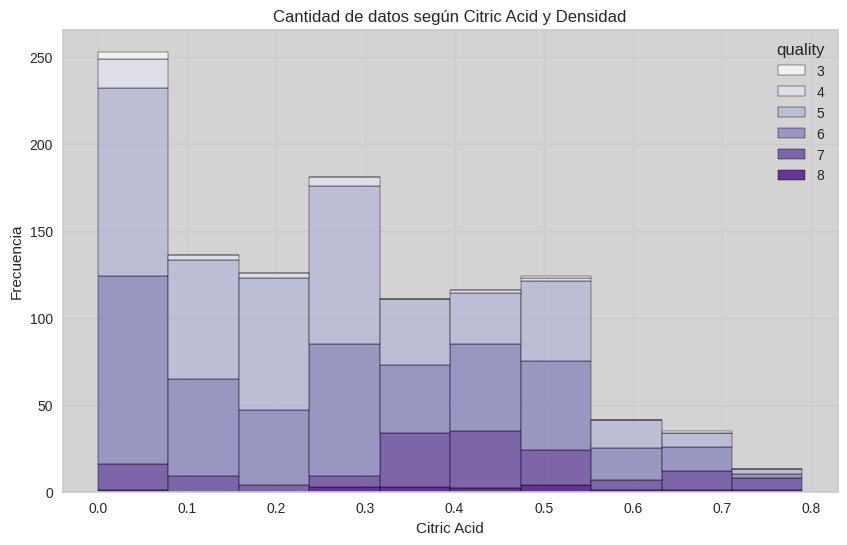

In [129]:
# Comenzamos la prueba gráfica.

plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('lightgrey')
sns.histplot(data=qw_ac_eliminado, x='citric acid', hue='quality', palette='Purples', multiple='stack', bins=10)
plt.xlabel('Citric Acid')
plt.ylabel('Frecuencia')
plt.title('Cantidad de datos según Citric Acid y Densidad')
plt.show()

<ipython-input-130-b0e064e62d3e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='citric acid', data=qw_ac_eliminado, palette='Purples')


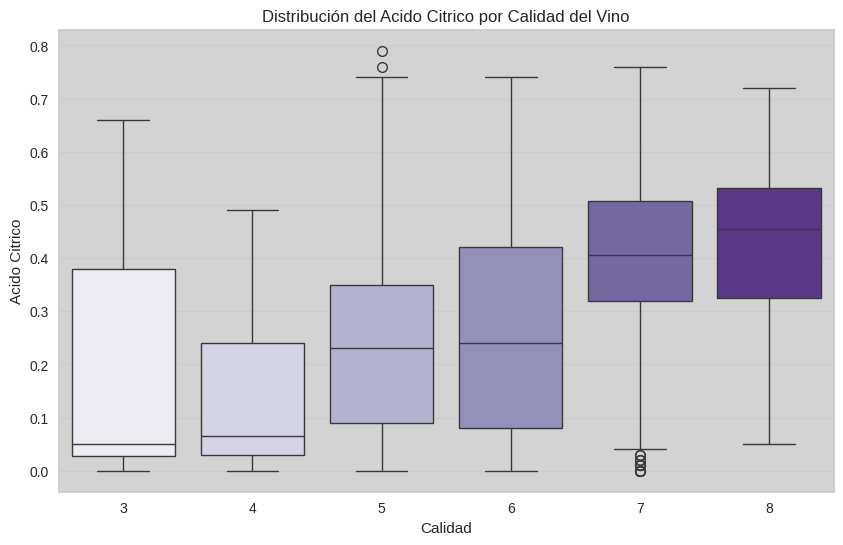

In [130]:
# Seguimos con un boxplot.

plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('lightgrey')
sns.boxplot(x='quality', y='citric acid', data=qw_ac_eliminado, palette='Purples')
plt.xlabel('Calidad')
plt.ylabel('Acido Citrico')
plt.title('Distribución del Acido Citrico por Calidad del Vino')
plt.show()

# Aquí ya podemos observar que la media de los vinos de mejor calidad contienen mayor nivel de acido cítrico.

# **Hasta aquí. Hemos podido observar que:**

 1. Los vinos de mejor calidad, en su media, poseen una cantidad de **alcohol** entre **11 y 13 grados.**
 2. Así también, contrario lo que se tiende a pensar, si la acidez volátil se logra con el añejamiento, no significa que su carga alta se traduzca en calidad. Un nivel bajo de **acidez volatil**, **entre 0.2 y 0.6**, dará un vino de calidad.
 3. Podemos decir que la influencia de distintos factores indicaran un vino de buena calidad:

*   **Alcohol entre 11 y 13 grados.**
*   **Acidez volátil entre 0.2 y 0.6.**
*   **PH a niveles medios, entre 3.0 y 3.6.**
*   **Una densidad media, entre 0.994 y 0.998.**
*   **La presencia de ácido cítrico entre 0.4 y 0.5.**







In [170]:

# A partir de los analisis realizados. Partiremos con nuestro modelo de ML desde las variables mencionadas.
# Primero, intentaremos agrupar categorias, de forma coherente con los resultados que esperamos obtener.
# Simplificaremos la calidad del vino a definir, en 3. Baja, Media y Alta.

def categorizar_calidad(calidad):
    if calidad in [3, 4]:
        return 'Baja Calidad'
    elif calidad in [5, 6]:
        return 'Media Calidad'
    elif calidad in [7, 8]:
        return 'Alta Calidad'

qw['calidad_categorizada'] = qw['quality'].apply(categorizar_calidad)

print(qw[['quality', 'calidad_categorizada']].head(10))

   quality calidad_categorizada
0        5        Media Calidad
1        5        Media Calidad
2        5        Media Calidad
3        6        Media Calidad
4        5        Media Calidad
5        5        Media Calidad
6        5        Media Calidad
7        7         Alta Calidad
8        7         Alta Calidad
9        5        Media Calidad


In [146]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [147]:

# Como tenemos muchas variables con fronteras difusas dentro del modelo. Intentaremos ir con Random Forest dentro de un criterio de Clasificación.

X = qw.drop(['quality', 'calidad_categorizada', 'Id'], axis=1)
y = qw['calidad_categorizada']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


clf = RandomForestClassifier(n_estimators=100, random_state=42)


clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 29   0  17]
 [  1   0  10]
 [ 14   2 269]]
               precision    recall  f1-score   support

 Alta Calidad       0.66      0.63      0.64        46
 Baja Calidad       0.00      0.00      0.00        11
Media Calidad       0.91      0.94      0.93       285

     accuracy                           0.87       342
    macro avg       0.52      0.52      0.52       342
 weighted avg       0.85      0.87      0.86       342



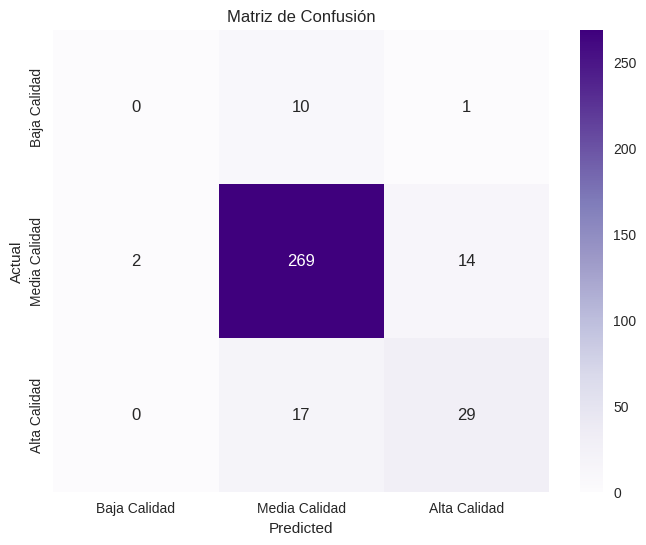

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Intentaremos graficar la "Matriz de Confusión" de el modelo de Random Forest.

cm = confusion_matrix(y_test, y_pred, labels=['Baja Calidad', 'Media Calidad', 'Alta Calidad'])


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Baja Calidad', 'Media Calidad', 'Alta Calidad'], yticklabels=['Baja Calidad', 'Media Calidad', 'Alta Calidad'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

In [149]:
clf = DecisionTreeClassifier(max_depth=15)

X= qw[['alcohol', 'volatile acidity', 'pH', 'density','citric acid']]
y= qw['calidad_categorizada']

clf = clf.fit(X, y)

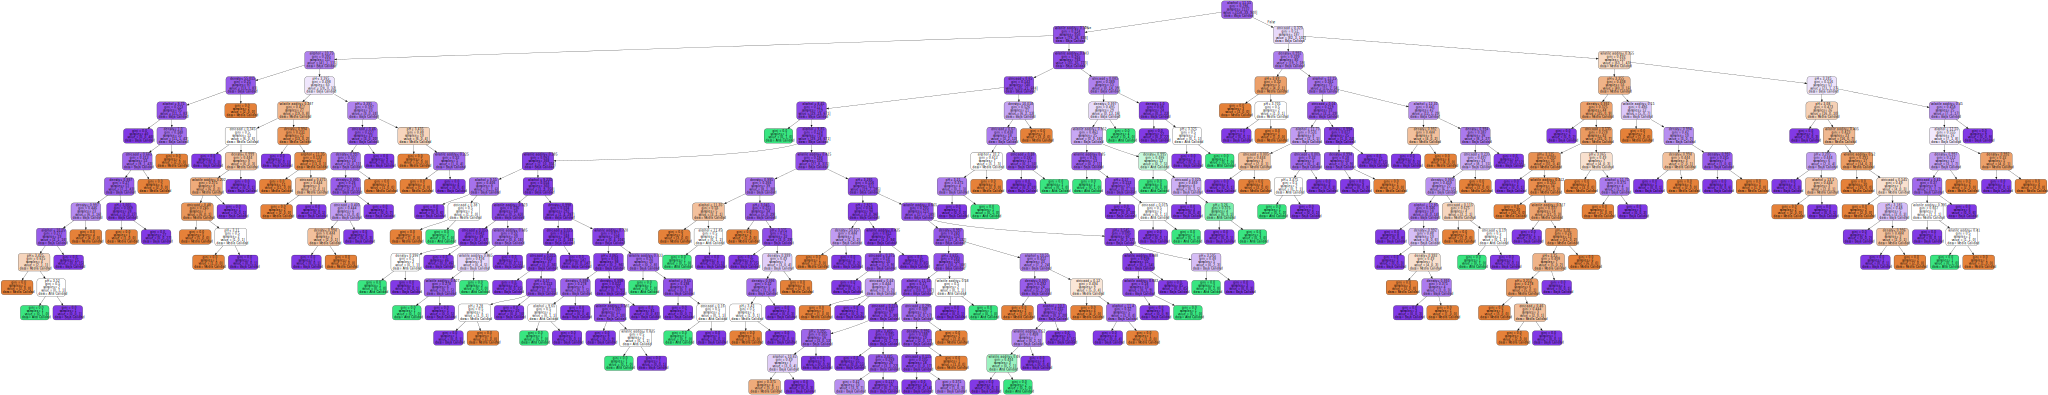

In [150]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X.columns,
                                class_names=y.unique(),
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [169]:
# Ante lo realizado. No quedo conforme en las clasificaciones.
# El arbol ha resultado muy extenso, y quizas hay riesgo de Overfitting.
# Ante esto. Entiendo que el problema esta en la mala distribuciòn de los datos del DF.
# Entiendo que es mejor simplificar las categorias, hasta quedarme con dos.
# De esta manera, identificaremos vinos de Buena Calidad, y Calidad Regular.


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Función para categorizar la calidad
def categorizar_calidad_nueva(calidad):
    if calidad == 'Alta Calidad':
        return 'Buena Calidad'
    else:
        return 'Calidad Regular'

# Aplicar la función al DataFrame
qw['calidad_nueva'] = qw['calidad_categorizada'].apply(categorizar_calidad_nueva)

# Verificar las primeras filas del DataFrame
print(qw[['quality', 'calidad_categorizada', 'calidad_nueva']].head(10))

# Asignar las características (X) y la nueva variable objetivo (y)
X = qw.drop(['quality', 'calidad_categorizada', 'calidad_nueva', 'Id'], axis=1)
y = qw['calidad_nueva']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predicción y evaluación del modelo
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

   quality calidad_categorizada    calidad_nueva
0        5        Media Calidad  Calidad Regular
1        5        Media Calidad  Calidad Regular
2        5        Media Calidad  Calidad Regular
3        6        Media Calidad  Calidad Regular
4        5        Media Calidad  Calidad Regular
5        5        Media Calidad  Calidad Regular
6        5        Media Calidad  Calidad Regular
7        7         Alta Calidad    Buena Calidad
8        7         Alta Calidad    Buena Calidad
9        5        Media Calidad  Calidad Regular
[[ 28  18]
 [ 12 284]]
                 precision    recall  f1-score   support

  Buena Calidad       0.70      0.61      0.65        46
Calidad Regular       0.94      0.96      0.95       296

       accuracy                           0.91       342
      macro avg       0.82      0.78      0.80       342
   weighted avg       0.91      0.91      0.91       342



In [154]:
clf = DecisionTreeClassifier(max_depth=15)

X= qw[['alcohol', 'volatile acidity', 'pH', 'density','citric acid']]
y= qw['calidad_nueva']

clf = clf.fit(X, y)

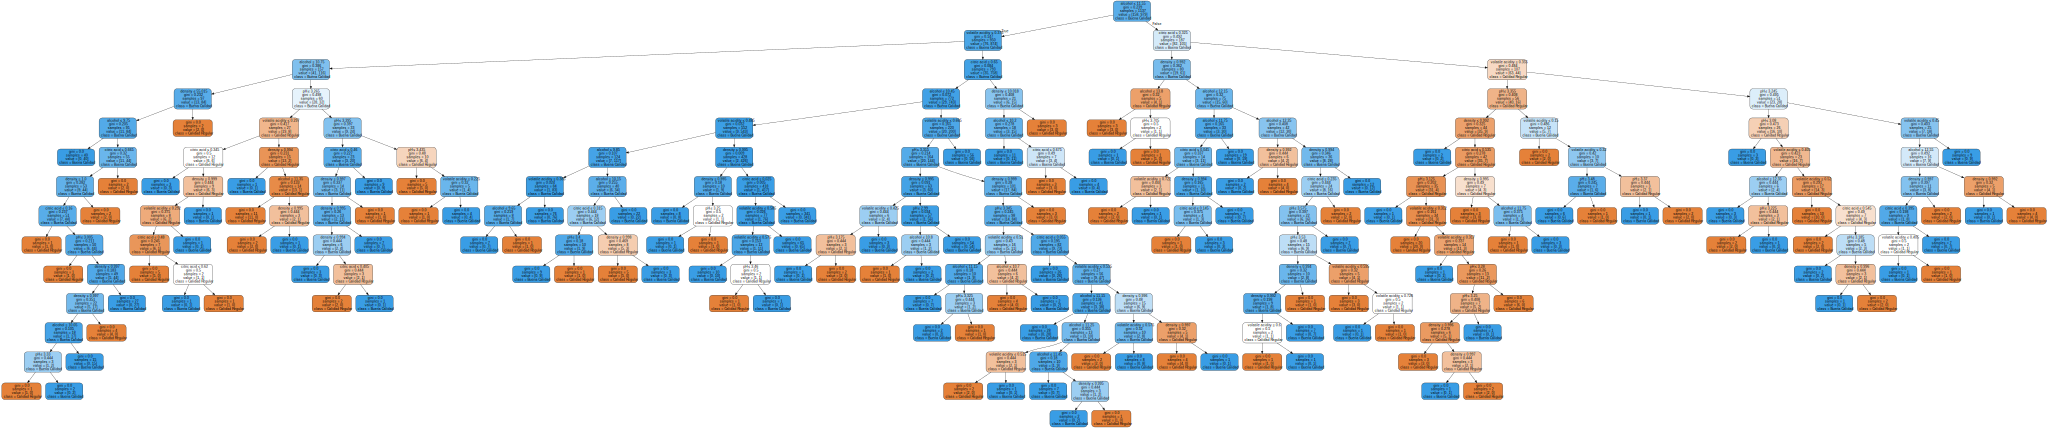

In [155]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X.columns,
                                class_names=y.unique(),
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [167]:
# Como vemos, hasta aquí logramos un porcentaje de Accuracy bastante bueno.
# Sin embargo, podemos probar con otro método para despejar dudas.

# Probemos con PCA.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np


X = qw.drop(['quality', 'calidad_categorizada', 'calidad_nueva', 'Id'], axis=1)
y = qw['calidad_nueva']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_train_codes = y_train.astype('category').cat.codes
y_test_codes = y_test.astype('category').cat.codes

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

clf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
clf_pca.fit(X_train_pca, y_train_codes)



RandomForestClassifier(random_state=42)

In [168]:
#Evaluemos el Accuracy Score del modelo PCA.

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_test_pred_pca = clf_pca.predict(X_test_pca)

# Evaluación del modelo
print("Accuracy Score:", accuracy_score(y_test_codes, y_test_pred_pca).round(2))


Accuracy Score: 0.88


# CONCLUSIÓN

Podemos observar como con el modelo de Random Forest, tenemos el mayor porcentaje de Accuracy. Razón por la cual será el modelo elegido.



*   Random Forest: 0.91
*   PCA: 0.88



Este modelo, permitirá comprender si un vino es de Buena Calidad o Calidad Regular según los parámetros hallados mediante el EDA.



*   Alcohol
*   pH
*   Acidez volátil
*   Ácido cítrico
*   Densidad

Nuestro Modelo, permitirá que consumidores puedan identificar realmente vinos de alta calidad, sin caer en falsas estrategias de marketing. A su vez, servirá como garantía para sommeliers y profesionales del área.